In [3]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
#the data set name is pistachio  which is a classification one the details are
dataset=pd.read_csv('/content/pistachio.csv')

In [5]:
#sample copy of original dataset
data=dataset.copy()

In [6]:
#dispalying the some rows
data.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,Class
0,73107,1161.8070,442.4074,217.7261,0.8705,305.0946,0.9424,77579,0.7710,2.0319,0.6806,0.6896,0.0061,0.0030,0.4756,0.9664,Kirmizi_Pistachio
1,89272,1173.1810,460.2551,251.9546,0.8369,337.1419,0.9641,92598,0.7584,1.8267,0.8151,0.7325,0.0052,0.0028,0.5366,0.9802,Siit_Pistachio
2,60955,999.7890,386.9247,209.1255,0.8414,278.5863,0.9465,64400,0.7263,1.8502,0.7663,0.7200,0.0063,0.0034,0.5184,0.9591,Kirmizi_Pistachio
3,79537,1439.5129,466.7973,221.2136,0.8806,318.2289,0.9437,84281,0.7568,2.1102,0.4823,0.6817,0.0059,0.0028,0.4648,0.9807,Kirmizi_Pistachio
4,96395,1352.6740,515.8730,246.5945,0.8784,350.3340,0.9549,100950,0.7428,2.0920,0.6620,0.6791,0.0054,0.0026,0.4612,0.9648,Kirmizi_Pistachio


In [7]:
#check duplicated data
duprows=data[data.duplicated()]
duprows

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,Class


In [8]:
#shows the all calculating some statistical data like percentile, mean and std of the numerical values of the Series or DataFrame
data.describe(include="all")

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,Class
count,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kirmizi_Pistachio
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,998
mean,79871.952852,1421.797588,446.206444,238.193128,0.840347,317.790000,0.940103,84947.671129,0.716055,1.899342,0.570831,0.712841,0.005704,0.003017,0.510097,0.955185,NaN
std,12968.217051,373.408835,31.885328,30.426445,0.049026,26.571699,0.050006,13081.742551,0.052534,0.241253,0.211514,0.044230,0.000810,0.000334,0.063391,0.051735,NaN
min,29808.000000,858.363000,321.425500,133.509600,0.504900,194.814600,0.588000,37935.000000,0.427200,1.158500,0.062800,0.476000,0.004000,0.002400,0.226600,0.620400,NaN
25%,71898.500000,1169.633225,426.554100,217.875475,0.817500,302.562375,0.920250,76357.750000,0.688100,1.736325,0.372325,0.682000,0.005200,0.002800,0.465125,0.944200,NaN
50%,79795.000000,1260.785500,448.453150,235.888750,0.850250,318.744650,0.953800,84973.000000,0.726100,1.899550,0.643850,0.709750,0.005600,0.003000,0.503750,0.972800,NaN
75%,88980.000000,1599.479000,467.515200,257.433625,0.875375,336.590000,0.976300,93660.750000,0.753600,2.068575,0.744450,0.741600,0.006100,0.003200,0.549975,0.986800,NaN


In [9]:
#calculating pistachio  target variable valules count
data['Class'].value_counts()

,count
Class,
Kirmizi_Pistachio,998
Siit_Pistachio,720


#DATA CLEANING

In [10]:
#checking null values percentage
null_percent=data.isnull().sum()/len(data)*100
null_percent

,0
AREA,0.0
PERIMETER,0.0
MAJOR_AXIS,0.0
MINOR_AXIS,0.0
ECCENTRICITY,0.0
EQDIASQ,0.0
SOLIDITY,0.0
CONVEX_AREA,0.0
EXTENT,0.0
ASPECT_RATIO,0.0


In [11]:
#checking oulier percentage
def outlier_percent(data,column):
  Q1=data[column].quantile(0.25)
  Q3=data[column].quantile(0.75)
  IQR=Q3-Q1
  lower_bound=Q1-1.5*IQR
  upper_bound=Q3+1.5*IQR
  outliers=data[(data[column]<lower_bound) | (data[column]>upper_bound)]
  percentage=(len(outliers)/len(data))*100
  return percentage

numeric_cols=data.select_dtypes(include=np.number).columns
for col in numeric_cols:
  percentage=outlier_percent(data,col)
  print(f'The percentage of outliers in {col} is {percentage:.2f}%')

The percentage of outliers in AREA is 1.40%
The percentage of outliers in PERIMETER is 4.02%
The percentage of outliers in MAJOR_AXIS is 1.51%
The percentage of outliers in MINOR_AXIS is 1.98%
The percentage of outliers in ECCENTRICITY is 3.49%
The percentage of outliers in EQDIASQ is 1.51%
The percentage of outliers in SOLIDITY is 3.90%
The percentage of outliers in CONVEX_AREA is 1.22%
The percentage of outliers in EXTENT is 2.62%
The percentage of outliers in ASPECT_RATIO is 0.81%
The percentage of outliers in ROUNDNESS is 0.00%
The percentage of outliers in COMPACTNESS is 1.16%
The percentage of outliers in SHAPEFACTOR_1 is 2.39%
The percentage of outliers in SHAPEFACTOR_2 is 2.56%
The percentage of outliers in SHAPEFACTOR_3 is 1.75%
The percentage of outliers in SHAPEFACTOR_4 is 7.63%


In [12]:
#removing outliers
def remove_outliers_iqr(data,columns):
  for column in columns:
    Q1=data[column].quantile(0.25)
    Q3=data[column].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    #filter data within the bounds
    data=data[(data[column]>=lower_bound) & (data[column]<=upper_bound)]
  return data


In [13]:
#dropping some of the outliers from the data because their %<2
columns_with_outliers=['MAJOR_AXIS','COMPACTNESS','CONVEX_AREA','EQDIASQ','ASPECT_RATIO','SHAPEFACTOR_3']
data1=remove_outliers_iqr(data,columns_with_outliers)
data1.shape


(1647, 17)

In [14]:
data1.shape

(1647, 17)

shape factor1 outliers handling


In [15]:
#replace the outliers  with mode value
mode = data1["SHAPEFACTOR_1"].mode()
mid = data1["SHAPEFACTOR_1"].median()
Q1 = data1["SHAPEFACTOR_1"].quantile(0.25)
Q3 = data1['SHAPEFACTOR_1'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
data1['SHAPEFACTOR_1'] = np.where(data1["SHAPEFACTOR_1"]>upper_whisker,mode,np.where(data1["SHAPEFACTOR_1"]<lower_whisker,mode,data1["SHAPEFACTOR_1"]))


minor axis column outliers handling


In [16]:
Q1 = data1["MINOR_AXIS"].quantile(0.25)
Q3 = data1['MINOR_AXIS'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
data1['MINOR_AXIS']=np.where(data1['MINOR_AXIS']>upper_whisker,upper_whisker,np.where(data1['MINOR_AXIS']<lower_whisker,lower_whisker,data1['MINOR_AXIS']))

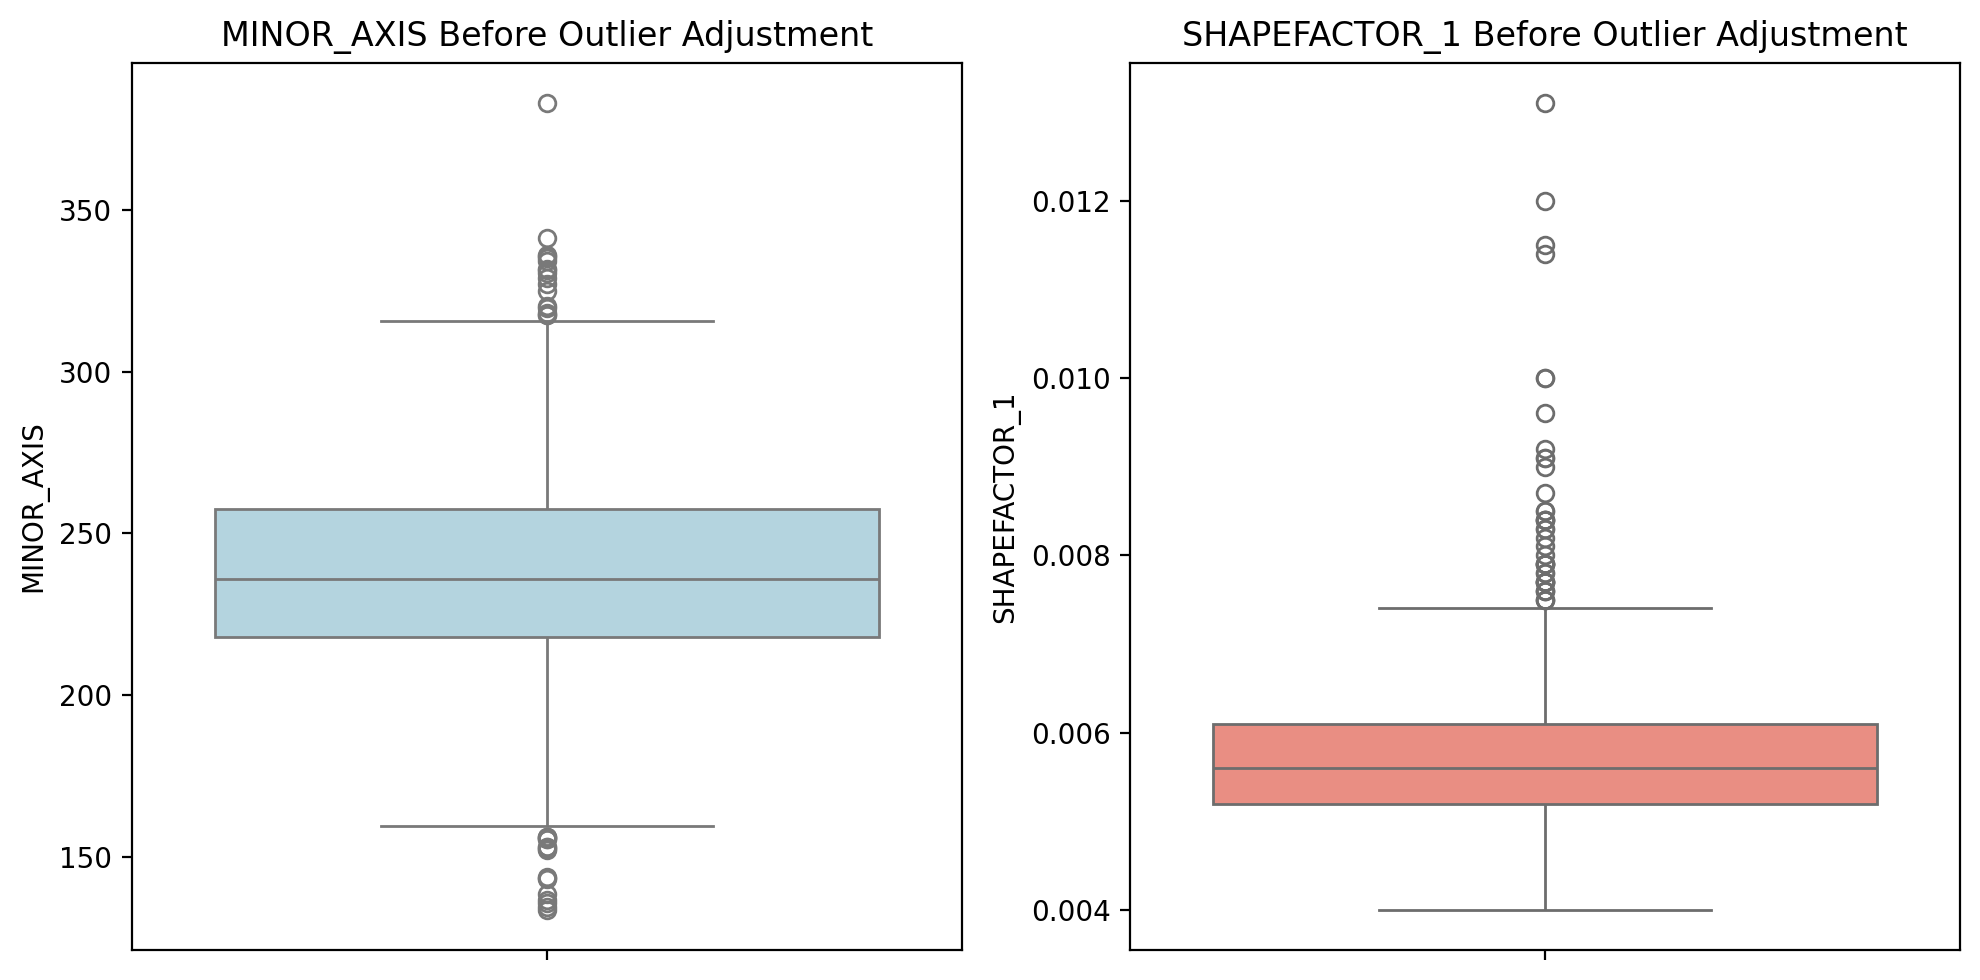

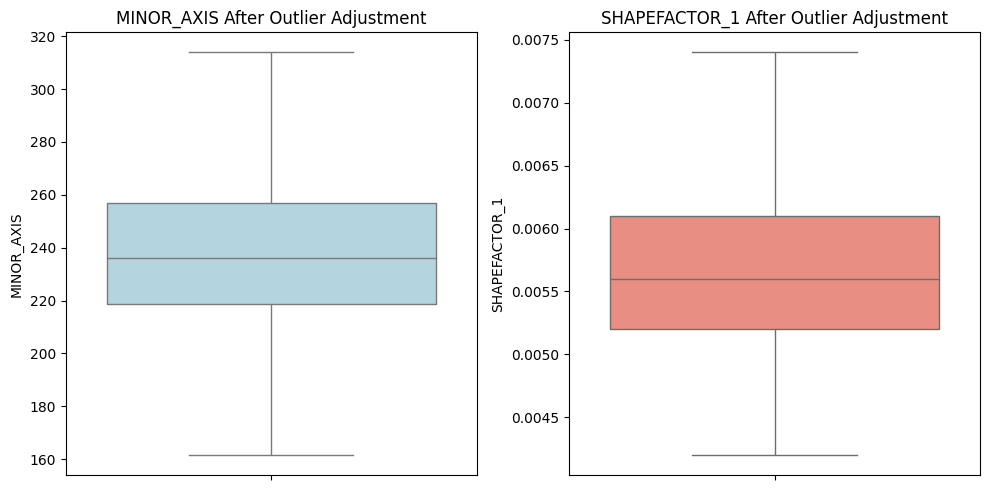

In [17]:
# Define a dictionary to map column names to colors
box_colors = {
    'MINOR_AXIS': 'lightblue',  # Or any color you prefer
    'SHAPEFACTOR_1': 'salmon'   # Or any color you prefer
}

# Before adjusting outliers
plt.figure(figsize=(10, 5),dpi=200)

plt.subplot(1, 2, 1)
sns.boxplot(y=data['MINOR_AXIS'], color=box_colors['MINOR_AXIS'])
plt.title('MINOR_AXIS Before Outlier Adjustment')

plt.subplot(1, 2, 2)
sns.boxplot(y=data['SHAPEFACTOR_1'], color=box_colors['SHAPEFACTOR_1'])
plt.title('SHAPEFACTOR_1 Before Outlier Adjustment')

plt.tight_layout()
plt.show()

# After adjusting outliers
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=data1['MINOR_AXIS'], color=box_colors['MINOR_AXIS'])
plt.title('MINOR_AXIS After Outlier Adjustment')

plt.subplot(1, 2, 2)
sns.boxplot(y=data1['SHAPEFACTOR_1'], color=box_colors['SHAPEFACTOR_1'])
plt.title('SHAPEFACTOR_1 After Outlier Adjustment')

plt.tight_layout()
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'AREA'),
  Text(1, 0, 'PERIMETER'),
  Text(2, 0, 'MAJOR_AXIS'),
  Text(3, 0, 'MINOR_AXIS'),
  Text(4, 0, 'ECCENTRICITY'),
  Text(5, 0, 'EQDIASQ'),
  Text(6, 0, 'SOLIDITY'),
  Text(7, 0, 'CONVEX_AREA'),
  Text(8, 0, 'EXTENT'),
  Text(9, 0, 'ASPECT_RATIO'),
  Text(10, 0, 'ROUNDNESS'),
  Text(11, 0, 'COMPACTNESS'),
  Text(12, 0, 'SHAPEFACTOR_1'),
  Text(13, 0, 'SHAPEFACTOR_2'),
  Text(14, 0, 'SHAPEFACTOR_3'),
  Text(15, 0, 'SHAPEFACTOR_4')])

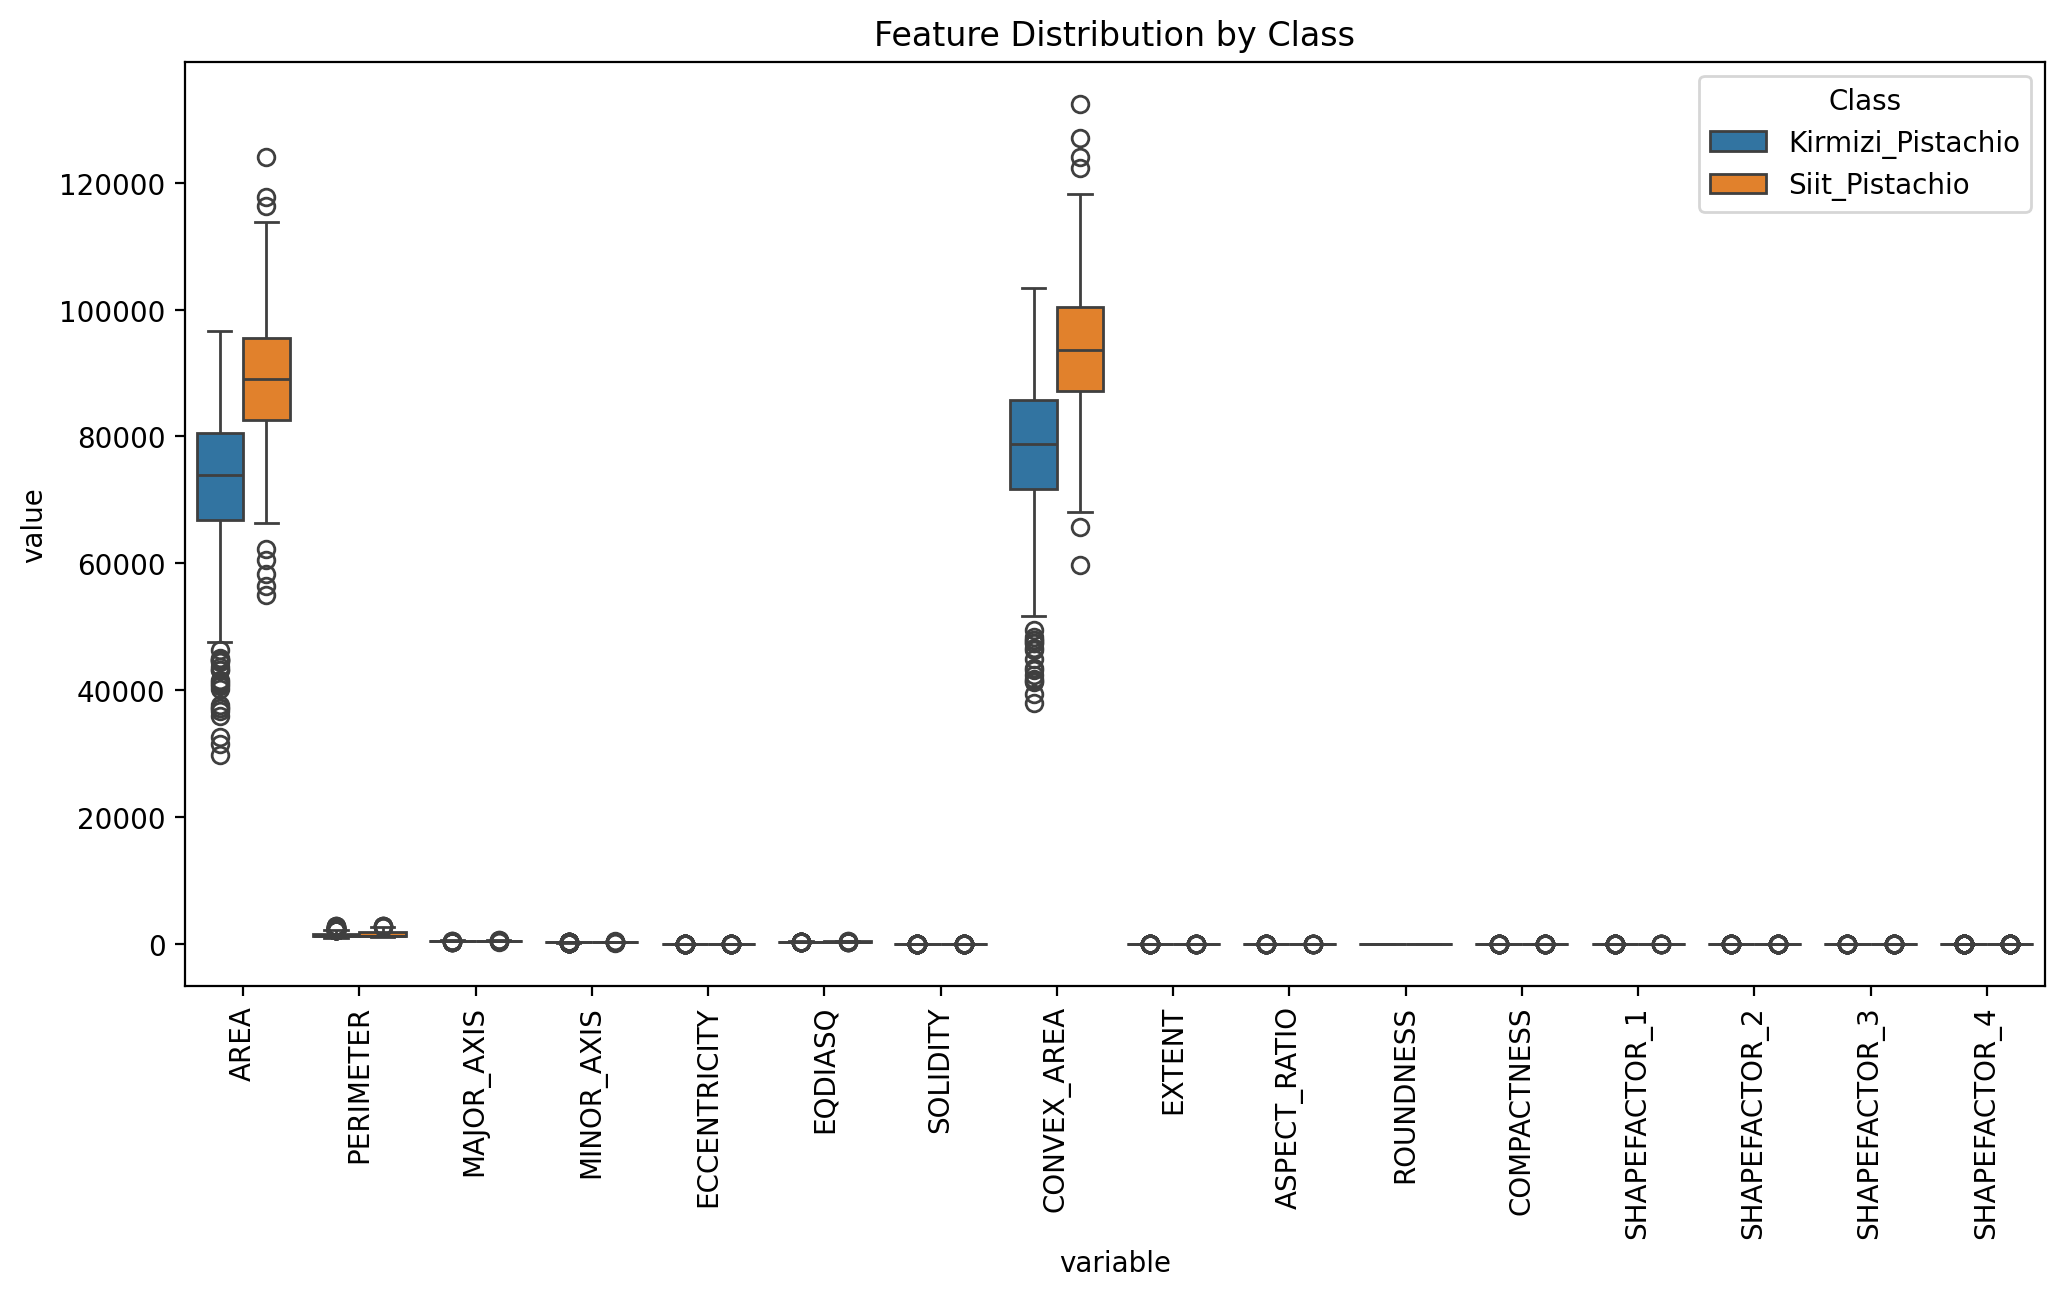

In [18]:
    # 3. Box plots for numerical features
    plt.figure(figsize=(12, 6),dpi=200)
    numerical_features = data1.drop('Class', axis=1).columns
    data1_melted = data.melt(id_vars=['Class'], value_vars=numerical_features)
    sns.boxplot(x='variable', y='value', hue='Class', data=data1_melted)
    plt.title('Feature Distribution by Class')
    plt.xticks(rotation=90)

In [19]:
# Pairplot to visualize pairwise relationships between features, colored by 'Class'.
# This plot helps us understand the relationship between different features
# and how they might be used to separate the different classes of pistachios.
# We can observe correlations, clusters, and potential separation patterns.
#sns.pairplot(data1,hue='Class')

#LABELING THE TARGET VARIABLE

In [20]:
#encodig the target column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data1["Class_label"] = le.fit_transform(data1["Class"])

In [21]:
data1 = data1.drop("Class", axis = 1)

#ML MODELS


#MODEL1 : logistic regression


In [24]:
x = data1.drop("Class_label",axis=1)
y = data1[["Class_label"]]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state =2,stratify=y)




from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
# Fit the model to the training data
lr = LogisticRegression()
lr.fit(x_train,y_train)
# Make predictions on the test data
y_pred = lr.predict(x_test)
# accuracy of the model
lr_accuracy = accuracy_score(y_test,y_pred)*100

print(f"train data score: {lr.score(x_train,y_train)}")
print(f"traintest data score: {lr.score(x_test,y_test)})")

from sklearn.metrics import accuracy_score
#printing accuracy of the model
print(f"accuracy score: {lr_accuracy}")

train data score: 0.8647773279352227
traintest data score: 0.8543689320388349)
accuracy score: 85.43689320388349


In [25]:
#To check null accuracy for the model

import numpy as np
from collections import Counter

# Count the occurrences of each class
class_counts = Counter(y_test)

# Find the most frequent class
most_frequent_class = max(class_counts, key=class_counts.get)

# Calculate null accuracy
null_accuracy = class_counts[most_frequent_class] / len(y_test)

# Print the result
print(f"Class Distribution: {dict(class_counts)}")
print(f"Most Frequent Class: {most_frequent_class}")
print(f"Null Accuracy: {null_accuracy:.6f}")

Class Distribution: {'Class_label': 1}
Most Frequent Class: Class_label
Null Accuracy: 0.002427


In [26]:
#k fold validation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

#performing k fold validation
k=5
scores=cross_val_score(lr,x_train,y_train,cv=k,scoring="accuracy")

#dispaly the results
print(scores)

# Calculate and assign the mean cross-validation score
lr_kfold_score = scores.mean() * 100

print("k fold mean value:%.4f" %lr_kfold_score)

[0.82591093 0.90283401 0.84615385 0.87044534 0.87044534]
k fold mean value:86.3158


#MODEL2: decision tree classification


In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state =1,stratify=y)

from sklearn.tree import DecisionTreeClassifier

# Instantiate the DecisionTreeClassifier with hyperparameters
decision_tree = DecisionTreeClassifier(
    criterion='gini',  # or 'entropy'
    max_depth=5,  # Adjust the maximum depth of the tree
    min_samples_split=2,  # Minimum samples required to split a node
    min_samples_leaf=1,  # Minimum samples required at a leaf node
    max_features=None,  # Number of features to consider for the best split
    random_state=42  # Set a random state for reproducibility
)

# Fit the model to the training data
decision_tree.fit(x_train, y_train)

# Make predictions on the test data
y_pred = decision_tree.predict(x_test)
from sklearn.metrics import accuracy_score
decision_tree_accuracy=accuracy_score(y_test,y_pred)*100


print(f"train data score: {decision_tree.score(x_train,y_train)}")
print(f"test data score: {decision_tree.score(x_test,y_test)})")


print('Accuracy of Decision Tree is : %.4f' %decision_tree_accuracy)

train data score: 0.8979757085020242
test data score: 0.8859223300970874)
Accuracy of Decision Tree is : 88.5922


In [30]:
#To check null accuracy for the model

import numpy as np
from collections import Counter

# Count the occurrences of each class
class_counts = Counter(y_test)

# Find the most frequent class
most_frequent_class = max(class_counts, key=class_counts.get)

# Calculate null accuracy
null_accuracy = class_counts[most_frequent_class] / len(y_test)

# Print the result
print(f"Class Distribution: {dict(class_counts)}")
print(f"Most Frequent Class: {most_frequent_class}")
print(f"Null Accuracy: {null_accuracy:.4f}")

Class Distribution: {'Class_label': 1}
Most Frequent Class: Class_label
Null Accuracy: 0.0024


In [31]:
#k fold validation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

#performing k fold validation
k=5
scores=cross_val_score(decision_tree,x_train,y_train,cv=k,scoring="accuracy")

#dispaly the results
print(scores)

# Calculate and assign the mean cross-validation score
decision_tree_kfold_score = scores.mean() * 100

print("k fold mean value:%.4f" %decision_tree_kfold_score)

[0.83805668 0.83805668 0.80566802 0.85020243 0.83805668]
k fold mean value:83.4008


#MODEL3: random forest


In [46]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state =1,stratify=y)
#applying RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)

print(f"train data score: {rfc.score(x_train,y_train)}")
print(f"test data score: {rfc.score(x_test,y_test)}")

#printing accuracy of the model
random_forest_accuracy=accuracy_score(y_test,y_pred)*100
print('Accuracy of Random Forest is : %.4f' %random_forest_accuracy)


train data score: 1.0
test data score: 0.883495145631068
Accuracy of Random Forest is : 88.3495


In [47]:
#To check null accuracy for the model

import numpy as np
from collections import Counter

# Count the occurrences of each class
class_counts = Counter(y_test)

# Find the most frequent class
most_frequent_class = max(class_counts, key=class_counts.get)

# Calculate null accuracy
null_accuracy = class_counts[most_frequent_class] / len(y_test)

# Print the result
print(f"Class Distribution: {dict(class_counts)}")
print(f"Most Frequent Class: {most_frequent_class}")
print(f"Null Accuracy: {null_accuracy:.6f}")

Class Distribution: {'Class_label': 1}
Most Frequent Class: Class_label
Null Accuracy: 0.002427


          feature  importance
3      MINOR_AXIS    0.148854
12  SHAPEFACTOR_1    0.138574
14  SHAPEFACTOR_3    0.119678
11    COMPACTNESS    0.075841
5         EQDIASQ    0.073486
0            AREA    0.072926
9    ASPECT_RATIO    0.055465
4    ECCENTRICITY    0.052784
15  SHAPEFACTOR_4    0.050255
7     CONVEX_AREA    0.042599
6        SOLIDITY    0.034574
8          EXTENT    0.033927
10      ROUNDNESS    0.032928
2      MAJOR_AXIS    0.029670
1       PERIMETER    0.027347
13  SHAPEFACTOR_2    0.011091


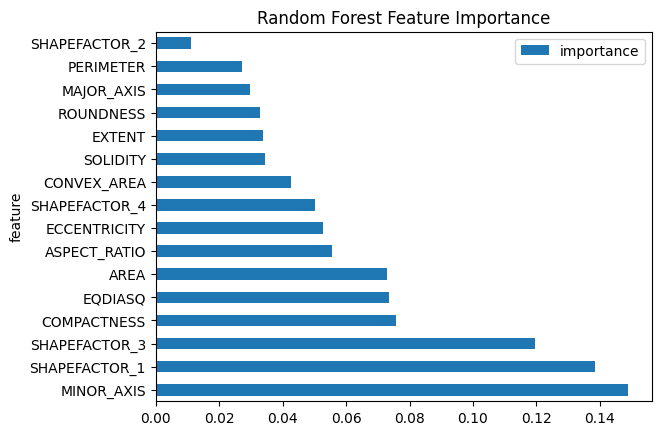

In [48]:
#extracting imporatance features
importances=rfc.feature_importances_
feature_importances_=pd.DataFrame({'feature':x_train.columns,'importance':importances})
feature_importances_=feature_importances_.sort_values('importance',ascending=False)
print(feature_importances_)
feature_importances_.plot(x='feature', y='importance', kind='barh')
plt.title('Random Forest Feature Importance')
plt.show()

In [51]:
# Define the parameter grid to search
param_grid = {
    'n_estimators': [150, 200, 500],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object
from sklearn.model_selection import GridSearchCV, StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=skf, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search.fit(x, y)

# Print the best hyperparameters and the best score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Get the best model
best_rfc = grid_search.best_estimator_

Best hyperparameters: {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Best score: 0.8749039172209905


In [50]:
#k fold validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score


#initializing RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=500)

#performing k fold validation
k=5
scores=cross_val_score(rfc,x_train,y_train,cv=k,scoring="accuracy")

#dispaly the results
print(scores)
rfc_kfold_score=scores.mean() *100
print("k fold mean value:%.4f" %rfc_kfold_score)

[0.88259109 0.84210526 0.82591093 0.86639676 0.87044534]
k fold mean value:85.7490


#MODEL4: support vector machine

In [49]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state =1,stratify=y)

#appying SVM model
from sklearn.svm import SVC, LinearSVC
linear_svc = LinearSVC(max_iter=2000)
linear_svc.fit(x_train, y_train)
y_pred = linear_svc.predict(x_test)

#printing accuracy of the model
svm_accuracy=accuracy_score(y_test,y_pred)*100
print('Accuracy of Linear SVC is : %.4f' %svm_accuracy)

Accuracy of Linear SVC is : 88.3495


In [40]:
#k fold validation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

#performing k fold validation
k=5
scores=cross_val_score(linear_svc,x_train,y_train,cv=k,scoring="accuracy")

#dispaly the results
print(scores)
linear_svc_kfold_score=scores.mean()*100
print("k fold mean value: %.4f" %linear_svc_kfold_score)

[0.86234818 0.83805668 0.79352227 0.88663968 0.87044534]
k fold mean value: 85.0202


#displays all model accuracy

In [41]:
model_accuracies = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM'],
    'Accuracy': [lr_accuracy, decision_tree_accuracy, random_forest_accuracy, svm_accuracy],
    'k fold':[lr_kfold_score,decision_tree_kfold_score,rfc_kfold_score,linear_svc_kfold_score]
}

# Create the DataFrame
accuracy_df = pd.DataFrame(model_accuracies,index=[1,2,3,4])

# Display the DataFrame
print("Model Accuracies:")
print(accuracy_df)


Model Accuracies:
                 Model   Accuracy     k fold
1  Logistic Regression  85.436893  86.315789
2        Decision Tree  88.592233  83.400810
3        Random Forest  88.834951  85.425101
4                  SVM  88.349515  85.020243


#conclusion
This project successfully classified pistachio nuts using machine learning. Random Forest achieved the highest accuracy of (89.56) among the models tested. Feature importance analysis revealed key characteristics for classification. Further research can explore deep learning and real-world applications in the pistachio industry.